In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from pylab import *
from random import uniform
from math import sqrt
from math import exp

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
rocks_v_mines = pd.read_csv(target_url, header=None, prefix="V")

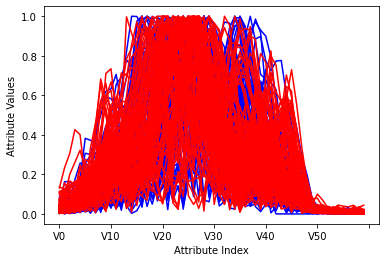

In [2]:
for i in range(208):
    if rocks_v_mines.iat[i, 60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"
    data_row = rocks_v_mines.iloc[i, 0:60]
    data_row.plot(color=pcolor)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

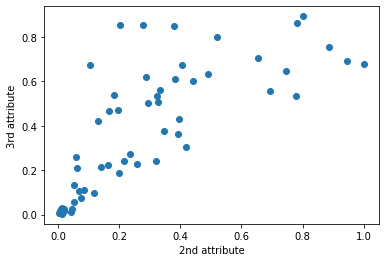

In [3]:
data_row2 = rocks_v_mines.iloc[1, 0:60]
data_row3 = rocks_v_mines.iloc[2, 0:60]
data_row21 = rocks_v_mines.iloc[20, 0:60]

plt.scatter(data_row2, data_row3)
plt.xlabel("2nd attribute")
plt.ylabel("3rd attribute")
plt.show()

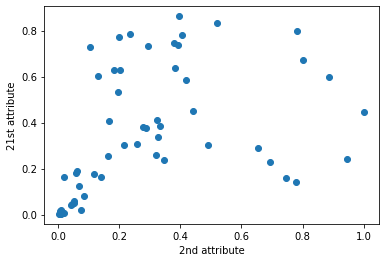

In [4]:
plt.scatter(data_row2, data_row21)
plt.xlabel("2nd attribute")
plt.ylabel("21st attribute")
plt.show()

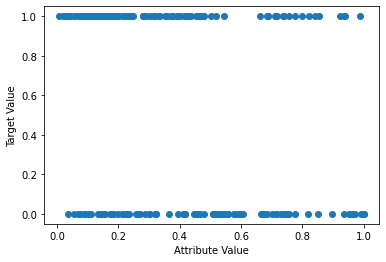

In [5]:
target = []
for i in range(208):
    if rocks_v_mines.iat[i, 60] == "M":
        target.append(1.0)
    else:
        target.append(0.0)
data_row = rocks_v_mines.iloc[0:208, 35]
plt.scatter(data_row, target)
plt.xlabel("Attribute Value")
plt.ylabel("Target Value")
plt.show()

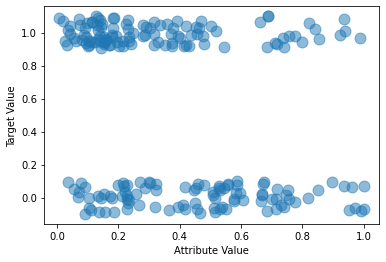

In [6]:
target = []
for i in range(208):
    if rocks_v_mines.iat[i, 60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))
data_row = rocks_v_mines.iloc[0:208, 35]
plt.scatter(data_row, target, alpha=0.5, s=120)
plt.xlabel("Attribute Value")
plt.ylabel("Target Value")
plt.show()

In [7]:
rocks_v_mines.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
mean2 = 0.0
mean3 = 0.0
mean21 = 0.0
num_el = len(data_row2)

for i in range(num_el):
    mean2 += data_row2[i] / num_el
    mean3 += data_row3[i] / num_el
    mean21 += data_row21[i] / num_el

var2 = 0.0
var3 = 0.0
var21 = 0.0

for i in range(num_el):
    var2 += (data_row2[i] - mean2) * (data_row2[i] - mean2) / num_el
    var3 += (data_row3[i] - mean3) * (data_row3[i] - mean3) / num_el
    var21 += (data_row21[i] - mean21) * (data_row21[i] - mean21) / num_el

corr23 = 0.0
corr221 = 0.0
for i in range(num_el):
    corr23 += (data_row2[i] - mean2) * (data_row3[i] - mean3) / (sqrt(var2 * var3) * num_el)
    corr221 += (data_row2[i] - mean2) * (data_row21[i] - mean21) / (sqrt(var2 * var21) * num_el)

print("Correlation between attribute 2 and 3")
print(corr23)
print("")
print("Correlation between attribute 2 and 21")
print(corr221)

Correlation between attribute 2 and 3
0.7709381211911223

Correlation between attribute 2 and 21
0.46654808078868865


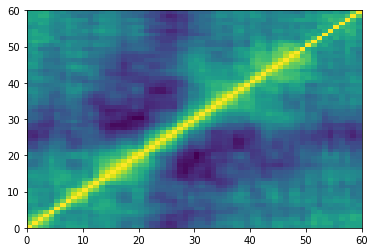

In [9]:
cor_mat = DataFrame(rocks_v_mines.corr())
plt.pcolor(cor_mat)
plt.show()

In [10]:
abalone =pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, prefix="V")
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole Wt",
    "Shucked Wt",
    "Viscera Wt",
    "Shell Wt",
    "Rings"
]
print(abalone.head())
print(abalone.tail())
summary = abalone.describe()
print(summary)

  Sex  Length  Diameter  Height  Whole Wt  Shucked Wt  Viscera Wt  Shell Wt  \
0   M   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   M   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   F   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   M   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   I   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   Rings  
0     15  
1      7  
2      9  
3     10  
4      7  
     Sex  Length  Diameter  Height  Whole Wt  Shucked Wt  Viscera Wt  \
4172   F   0.565     0.450   0.165    0.8870      0.3700      0.2390   
4173   M   0.590     0.440   0.135    0.9660      0.4390      0.2145   
4174   M   0.600     0.475   0.205    1.1760      0.5255      0.2875   
4175   F   0.625     0.485   0.150    1.0945      0.5310      0.2610   
4176   M   0.710     0.555   0.195    1.9485      0.9455      0.3765   

      Shell Wt  Rings  
41

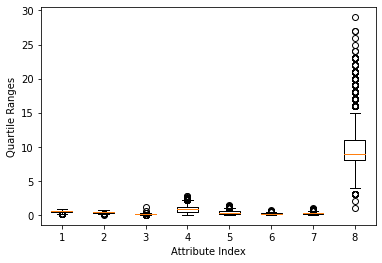

In [11]:
array = abalone.iloc[:, 1:9].values
boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges")
show()

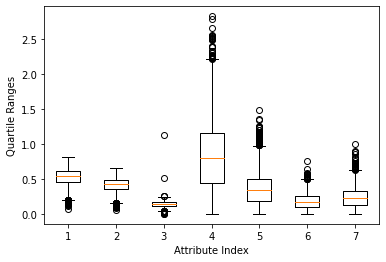

In [12]:
array2 = abalone.iloc[:, 1:8].values
boxplot(array2)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges")
show()

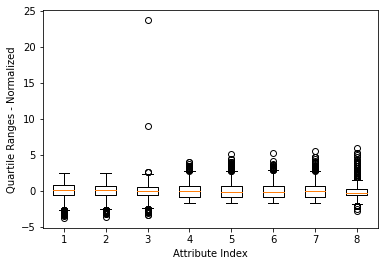

In [13]:
abalone_normalized = abalone.iloc[:, 1:9]
for i in range(8):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    abalone_normalized.iloc[:, i:(i + 1)] = (abalone_normalized.iloc[:, i:(i + 1)] - mean) / sd

array3 = abalone_normalized.values
boxplot(array3)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges - Normalized")
show()

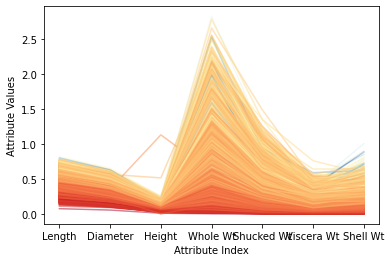

In [14]:
abalone_summ = abalone.describe()
min_rings = abalone_summ.iloc[3, 7]
max_rings = abalone_summ.iloc[7, 7]
nrows = len(abalone.index)

for i in range(nrows):
    data_row = abalone.iloc[i, 1:8]
    label_color = (abalone.iloc[i, 8] - min_rings) / (max_rings - min_rings)
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)

plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

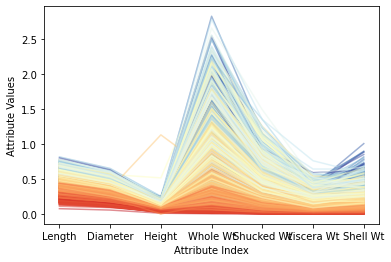

In [15]:
mean_rings = summary.iloc[1, 7]
sd_rings = summary.iloc[2, 7]

for i in range(nrows):
    data_row = abalone.iloc[i, 1:8]
    norm_target = (abalone.iloc[i, 8] - mean_rings) / sd_rings
    label_color = 1.0 / (1.0 + exp(-norm_target))
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
show()

              Length  Diameter    Height  Whole Wt  Shucked Wt  Viscera Wt  \
Length      1.000000  0.986812  0.827554  0.925261    0.897914    0.903018   
Diameter    0.986812  1.000000  0.833684  0.925452    0.893162    0.899724   
Height      0.827554  0.833684  1.000000  0.819221    0.774972    0.798319   
Whole Wt    0.925261  0.925452  0.819221  1.000000    0.969405    0.966375   
Shucked Wt  0.897914  0.893162  0.774972  0.969405    1.000000    0.931961   
Viscera Wt  0.903018  0.899724  0.798319  0.966375    0.931961    1.000000   
Shell Wt    0.897706  0.905330  0.817338  0.955355    0.882617    0.907656   
Rings       0.556720  0.574660  0.557467  0.540390    0.420884    0.503819   

            Shell Wt     Rings  
Length      0.897706  0.556720  
Diameter    0.905330  0.574660  
Height      0.817338  0.557467  
Whole Wt    0.955355  0.540390  
Shucked Wt  0.882617  0.420884  
Viscera Wt  0.907656  0.503819  
Shell Wt    1.000000  0.627574  
Rings       0.627574  1.000000  


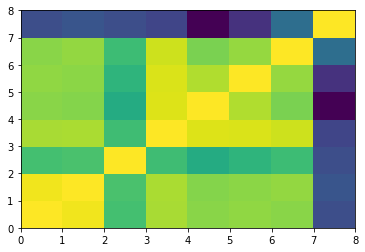

In [16]:
cor_mat = DataFrame(abalone.iloc[:, 1:9].corr())
print(cor_mat)
plt.pcolor(cor_mat)
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

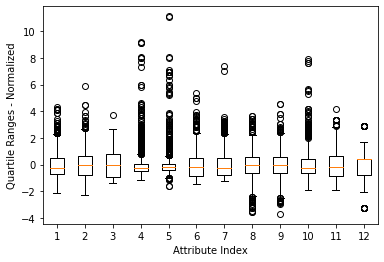

In [17]:
wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", header=0, sep=";")
print(wine.head())
summary = wine.describe()
print(summary)

wine_normalized = wine
ncols = len(wine_normalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wine_normalized.iloc[:, i:(i + 1)] = (wine_normalized.iloc[:, i:(i + 1)] - mean) / sd

array = wine_normalized.values
boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges - Normalized")
show()

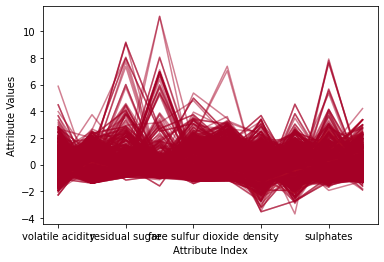

In [18]:
nrows = len(wine.index)
taste_col = len(summary.columns) - 1
mean_taste = summary.iloc[1, taste_col]
sd_taste = summary.iloc[2, taste_col]
n_data_col = len(wine.columns) - 1

for i in range(nrows):
    data_row = wine.iloc[i, 1:n_data_col]
    norm_target = (wine.iloc[i, n_data_col] - mean_taste) / sd_taste
    label_color = 1.0 / (1.0 + exp(-norm_target))
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

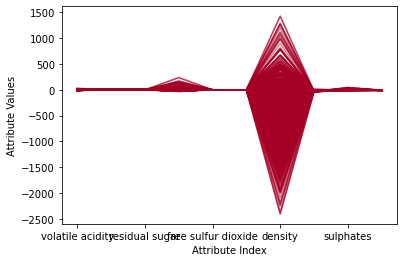

In [19]:
wine_normalized = wine
ncols = len(wine_normalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wine_normalized.iloc[:, i:(i + 1)] = (wine_normalized.iloc[:, i:(i + 1)] - mean) / sd

for i in range(nrows):
    data_row = wine_normalized.iloc[i, 1:n_data_col]
    norm_target = wine_normalized.iloc[i, n_data_col]
    label_color = 1.0 / (1.0 + exp(-norm_target))
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000  

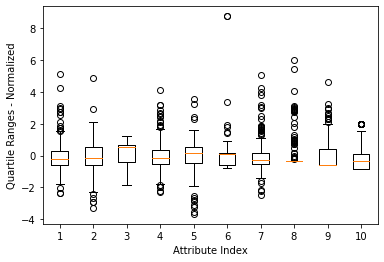

In [20]:
glass = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None, prefix="V")
glass.columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
print(glass.head())

summary = glass.describe()
print(summary)

ncol1 = len(glass.columns)
glass_normalized = glass.iloc[:, 1:ncol1]
ncol2 = len(glass_normalized.columns)

summary2 = glass_normalized.describe()

for i in range(ncol2):
    mean = summary2.iloc[1, i]
    sd = summary2.iloc[2, i]
    glass_normalized.iloc[:, i:(i + 1)] = (glass_normalized.iloc[:, i:(i + 1)] - mean) / sd

array = glass_normalized.values
boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges - Normalized")
plt.show()

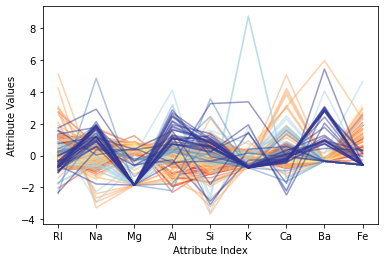

In [29]:
glass_normalized = glass
n_cols = len(glass_normalized.columns)
n_rows = len(glass_normalized.index)
summary = glass_normalized.describe()
n_data_col = n_cols - 1

for i in range(n_cols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    glass_normalized.iloc[:, i:(i + 1)] = (glass_normalized.iloc[:, i:(i + 1)] - mean) / sd

for i in range(n_rows):
    data_row = glass_normalized.iloc[i, 1:n_data_col]
    label_color = glass_normalized.iloc[i, n_data_col] / 7.0
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)

plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()